### Q2) Random Forest (10 Marks)

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In this assignment you will be trying to predict which user is going to buy a product displayed on a social media ad using the Random Forest classification method. You are free to use any library you want, though I will recommend checking this out: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


You will be using ads.csv dataset.

<strong>Note: You are required to submit the html files of both Q1 and Q2. Format should be q2_firsname_lastname_rollno.html</strong>


### Loading the dataset

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
dataset = pd.read_csv('ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Preprocessing

In [56]:
## Load the dataset into two variables for features and labels.
features = dataset[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
labels = dataset['Purchased']

# Since Gender is a categorical attribute, we will need to one-hot-encode the features df that contains it
features = pd.get_dummies(features)

In [57]:
## You are then required to split the dataset; 70 percent into training and 30 percent into testing. 
## This can be easily done by using the train_test_split function from the sklearn library.
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [58]:
## Standardize the independent features in the data using feature scaling
scaler = StandardScaler()
s1 = scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [59]:
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)

### Model training & evaluation

In [160]:
## Fit the Random Forest Classification to the Training set
## Use 10 estimators
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
## Predict the Test set results
y_pred = rf.predict(x_test)

In [167]:
## Calculate accuracy & make the confusion matrix
## Display the confusion matrix as a heatmap as well
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[69  8]
 [ 5 38]]
0.8916666666666667


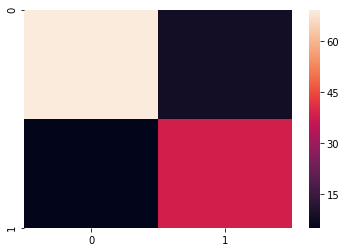

In [168]:
sns.heatmap(confusion_matrix(y_test,y_pred))

The results above show that the random forest classifier with 10 estimators achieves an accuracy of 89%. The confusion matrix also shows promising results with a true positive rate of 69, a true negative rate of 38 and comparatively low false positive and false negative rates of 8 and 5 respectively.

### How does the score of the classifier change as you change the number of estimators? 

Text(0, 0.5, 'Accuracy')

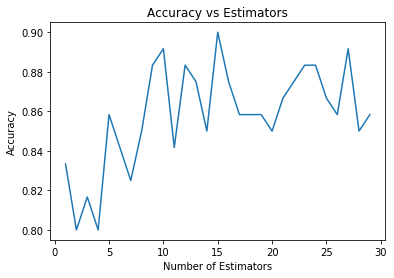

In [169]:
x_1 = []
y_1 = []
for i in range(1, 30):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train, y_train)
    predict = rf.predict(x_test)
    accuracy = accuracy_score(y_test, predict)
    x_1.append(i)
    y_1.append(accuracy)
plt.plot(x_1, y_1)
plt.title("Accuracy vs Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

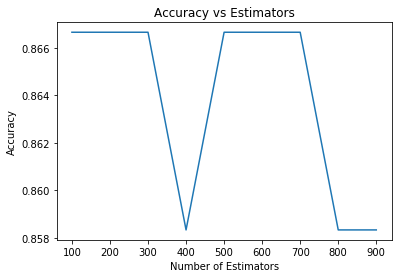

In [166]:
x_2 = []
y_2 = []
for i in range(0, 1000, 100):
    if i != 0:
        rf = RandomForestClassifier(n_estimators = i)
        rf.fit(x_train, y_train)
        predict = rf.predict(x_test)
        accuracy = accuracy_score(y_test, predict)
        x_2.append(i)
        y_2.append(accuracy)
plt.plot(x_2, y_2)
plt.title("Accuracy vs Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

The above plots show that there is a loose upward trend from estimators 1 to 10 afterwhich the accuracy value oscillates between 84 an 90%. For larger values of estimators, increasing the number did not improve the accuracy much but the accuracy stayed between 85.8% and 86.7%. 